In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns

In [2]:
# this defines rho_j in the paper. n is j.
def rho(n,N):
    rho=np.exp(2*np.pi*n*1j/N)
    return rho

def A(a,b):
    A_matrix=(1/(a+2*b+1))*np.array([[0,0,0,0], [0,0,0,0], [b,a,b,1], [0,0,0,0]])
    return A_matrix

def B(a,b):
    B_matrix=(1/(a+b+2))*np.array([[0,0,0,0], [0,0,0,0], [0,0,0,0], [a,b,1,1]])
    return B_matrix

def C(a,b):
    C_matrix=(1/(a+b+2))*np.array([[1,1,b,a], [0,0,0,0], [0,0,0,0], [0,0,0,0]])
    return C_matrix

def D(a,b):
    D_matrix=(1/(a+2*b+1))*np.array([[0,0,0,0], [1,b,a,b], [0,0,0,0], [0,0,0,0]])
    return D_matrix

# this defines H_j in the paper. n is j.
def H(n,N,a,b):
    H_matrix=np.zeros((4, 4))
    H_matrix=A(a,b)*rho(n,N) + B(a,b)*(rho(n,N))**2 + C(a,b)*(rho(n,N))**(N-2) + D(a,b)*(rho(n,N))**(N-1)
    return H_matrix

In [3]:
size=100

Coarse_Domain=np.linspace(0.01, 2.01, num=50)
Heat_Matrix=np.zeros((len(Coarse_Domain), len(Coarse_Domain)))
for i in range(0,len(Coarse_Domain)):
    for j in range(0,len(Coarse_Domain)):
        vector=[]
        for n in range(0, size):
            w= LA.eigvals(H(n, size, Coarse_Domain[i], Coarse_Domain[j]))
            vector=np.append(vector, abs(w))
        vector.sort()
        Heat_Matrix[len(Coarse_Domain)-j-1][i]=1-vector[len(vector)-2]

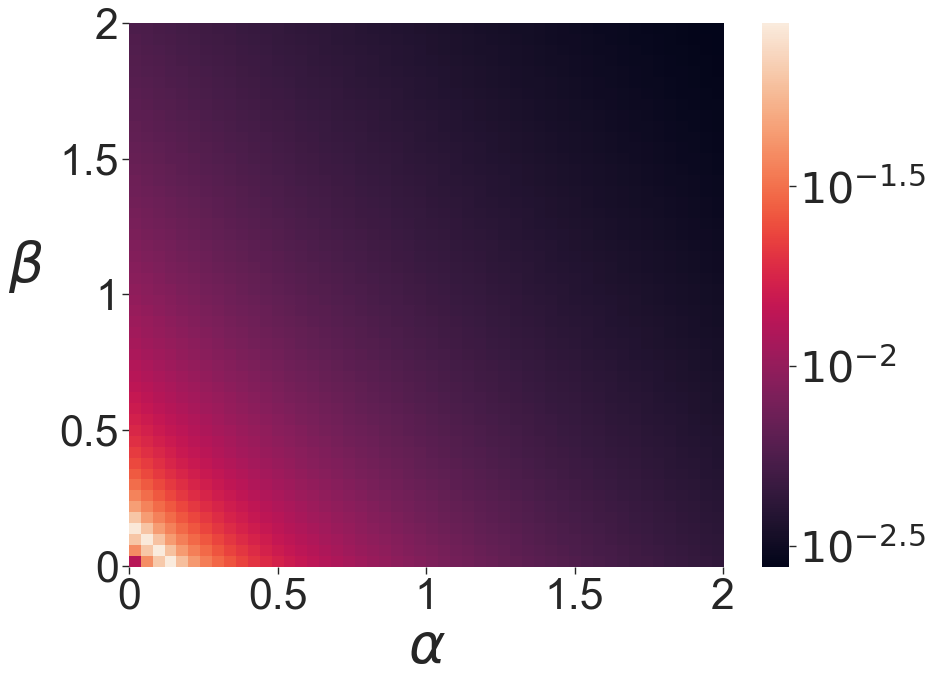

In [4]:
import matplotlib.ticker as ticker

figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=3.5)


xticks=[-0.5, 0, 0.5, 1, 1.5, 2]
yticks=[2.5, 2, 1.5, 1, 0.5, 0]

ax = sns.heatmap(np.log(Heat_Matrix)/np.log(10), xticklabels=xticks, yticklabels=yticks)
ax.tick_params(left=True, bottom=True)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-2.5, -2, -1.5])
cbar.set_ticklabels(['$10^{-2.5}$', '$10^{-2}$','$10^{-1.5}$'])

plt.xlabel("$\it{\u03B1}$", labelpad=5, fontsize=50)
plt.ylabel("$\it{\u03B2}$", labelpad=30, fontsize=50, rotation=0)
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 


ax.xaxis.set_major_locator(ticker.MultipleLocator(12.47))
ax.yaxis.set_major_locator(ticker.MultipleLocator(12.47))
plt.savefig('GAP',dpi=300, bbox_inches = "tight")
plt.show()